<a href="https://colab.research.google.com/github/21pa1a6157/-_-/blob/main/titanicSurvialPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Load **Data**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/code_alpha/train_and_test2.csv')

In [4]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [5]:
df.shape

(1309, 28)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [10]:
df.drop('Embarked', axis=1,inplace=True)

In [11]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

# **Visualization**

In [13]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0


In [14]:
gender = df['Sex'].value_counts()
gender

Sex
0    843
1    466
Name: count, dtype: int64

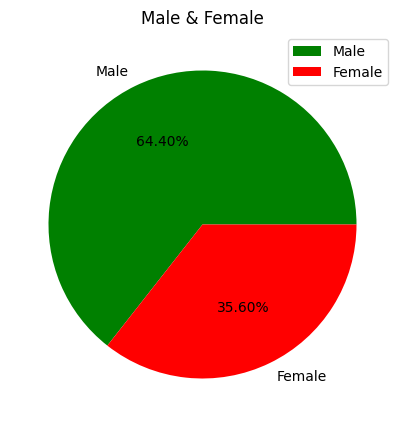

In [27]:
plt.figure(figsize=(10,5))
plt.pie(gender, labels=['Male', 'Female'] ,autopct='%.2f%%', colors=['green','red'])
plt.legend()
plt.title('Male & Female')
plt.show()

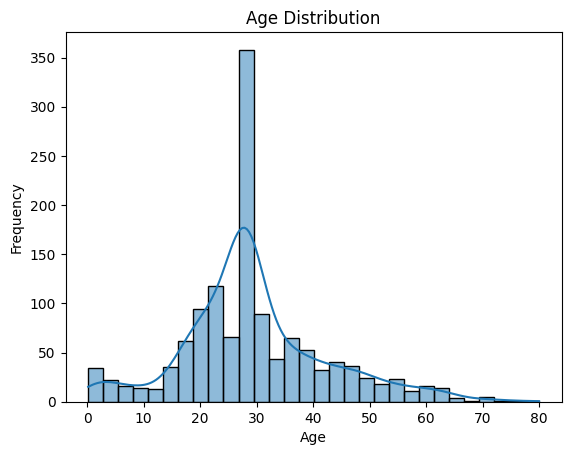

In [28]:
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [31]:
sv_sex = df[['2urvived','Sex']].value_counts().reset_index()
sv_sex

,2urvived,Sex,count
0,0,0,734
1,0,1,233
2,1,1,233
3,1,0,109


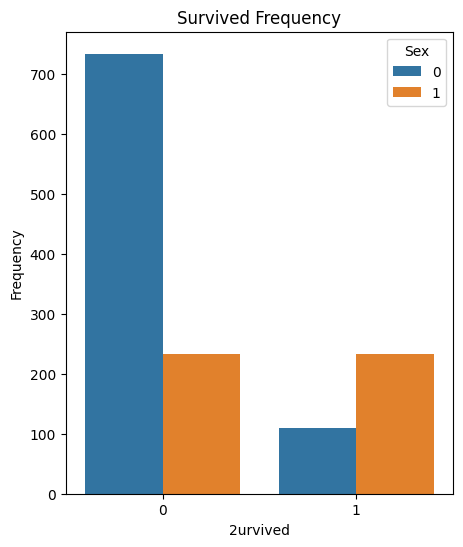

In [33]:
plt.figure(figsize=(5,6))
sns.barplot(data=sv_sex , x=sv_sex['2urvived'], y=sv_sex['count'], hue=sv_sex['Sex'])
plt.title('Survived Frequency')
plt.xlabel('2urvived')
plt.ylabel('Frequency')
plt.show()

In [34]:
sv_class = df[['2urvived', 'Pclass']].value_counts().reset_index()
sv_class

,2urvived,Pclass,count
0,0,3,590
1,0,2,190
2,0,1,187
3,1,1,136
4,1,3,119
5,1,2,87


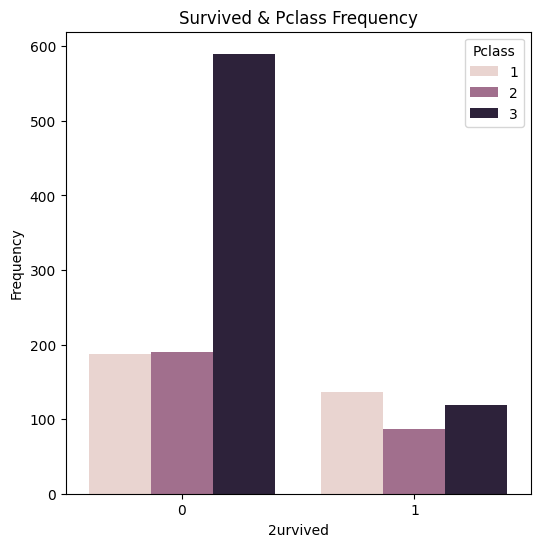

In [35]:
plt.figure(figsize=(6,6))
sns.barplot(data=sv_class , x=sv_class['2urvived'], y=sv_class['count'], hue=sv_class['Pclass'])
plt.title('Survived & Pclass Frequency')
plt.xlabel('2urvived')
plt.ylabel('Frequency')
plt.show()

In [37]:
sv_sibling = df[['2urvived', 'Pclass']].value_counts().reset_index()
sv_sibling

,2urvived,Pclass,count
0,0,3,590
1,0,2,190
2,0,1,187
3,1,1,136
4,1,3,119
5,1,2,87


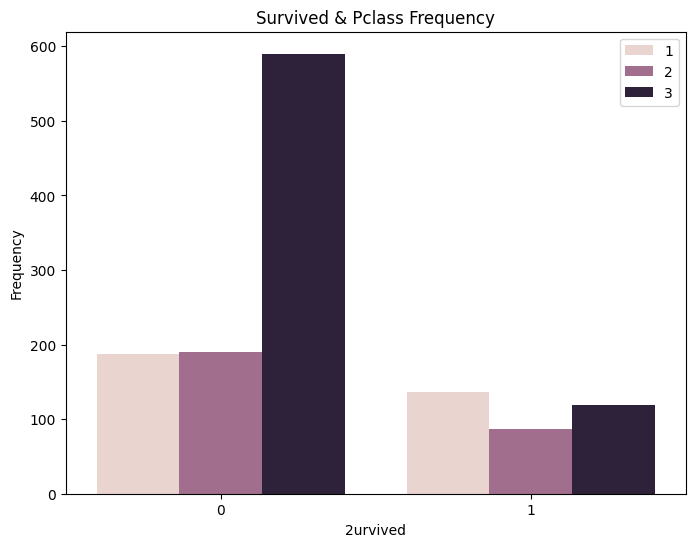

In [38]:
plt.figure(figsize=(8,6))
sns.barplot(data=sv_sibling , x=sv_sibling['2urvived'], y=sv_sibling['count'], hue=sv_sibling['Pclass'])
plt.title('Survived & Pclass Frequency')
plt.legend(loc='upper right')
plt.xlabel('2urvived')
plt.ylabel('Frequency')
plt.show()

# Building the **model**

In [40]:
test = df.drop(['Passengerid','Age','Sex'], axis=1)
test

,Fare,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,...,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,zero.17,zero.18,2urvived
0,7.2500,1,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
1,71.2833,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,7.9250,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,1
3,53.1000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,8.0500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,8.0500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
1305,108.9000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1306,7.2500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
1307,8.0500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0


In [41]:
label_encoder = LabelEncoder()

In [43]:
test['zero'] = label_encoder.fit_transform(test['zero'])
test['Parch'] = label_encoder.fit_transform(test['Parch'])

In [44]:
test

,Fare,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,...,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,zero.17,zero.18,2urvived
0,7.2500,1,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
1,71.2833,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,7.9250,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,1
3,53.1000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,8.0500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,8.0500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
1305,108.9000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1306,7.2500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
1307,8.0500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0


In [46]:
x= test.drop('2urvived', axis=1)
y = test['2urvived']

In [48]:
X_train, x_test, Y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=8)

# **Logistic Regression**

In [49]:
model_logistic = LogisticRegression()

In [50]:
model_logistic.fit(X_train,Y_train)

LogisticRegression()

In [51]:
model_logistic.score(X_train,Y_train)

0.7497612225405922

In [52]:
model_logistic.score(x_test,y_test)

0.6984732824427481

# Random **Forest**

In [53]:
model_random = RandomForestClassifier()

In [54]:
model_random.fit(X_train,Y_train)

RandomForestClassifier()

In [55]:
model_random.score(X_train,Y_train)

0.8567335243553008

In [56]:
model_random.score(x_test,y_test)

0.6870229007633588